---
title: Fashion MNIST
categories: deep-learning
date: 2020-12-15
---


数据集State-of-the-Art详见

- [mnist](https://paperswithcode.com/sota/image-classification-on-mnist)
- [fashion-mnist](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)
- [cifar-10](https://paperswithcode.com/sota/image-classification-on-cifar-10)

## 初始化

首先引入所用的包。然后是一些公共函数。下面代码比较长，可以先把函数的中文解释看过就好，细节忽略，后面用到再回来看。

In [1]:
import sys
from tensorflow.keras import Model, layers, regularizers, preprocessing

base_path = '/tf/eipi10/xuxiangwen.github.io/_notes/05-ai/54-tensorflow/code'
sys.path.append(base_path)

from image_classification import set_gpu_memory, lr_schedule, image_data_generator 
from image_classification import ImageClassificationHelper, ImageDataset

set_gpu_memory(1024)
model_results={}

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload

set max gpu memory to 1024


下面初始化模型运行的参数。

In [2]:
def image_data_generator():
    datagen = preprocessing.image.ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False) 
    return datagen  

params = {
    'dataset_name': 'cifar10-aug',
    'validation_percent': 0,    
    'use_data_augmentation': True,
    'augmentation_generator': image_data_generator(),   
    'batch_size': 32,    
    'epochs': 120,    
    'learning_rate':0.001,
    'dropout':0.1,
    'metrics':['accuracy'], 
    'use_lr_schedule': False,
    'lr_schedule': lr_schedule,
    'model_params':{
        'mlp':{'dropout':0.0},
        'lenet':{'dropout':0.1},
        'custom':{'dropout':0.1},
        'vgg':{'dropout':0.3},
        'resnet':{}
    }
}

helper = ImageClassificationHelper()
helper.set_params(params)
helper.set_model_results(model_results)
helper.set_data(ImageDataset(params))

load cifar10-aug data from source
train: (50000, 32, 32, 3) (50000,)
test: (10000, 32, 32, 3) (10000,)
create train, validation and test dataset


## 数据

MNIST数据集包含60,000张training图片和10,000张test图片，每张图片由$28\times28$ 个像素点构成，每个像素点用一个灰度值(0−255)表示。下面查看一下其中的图片。

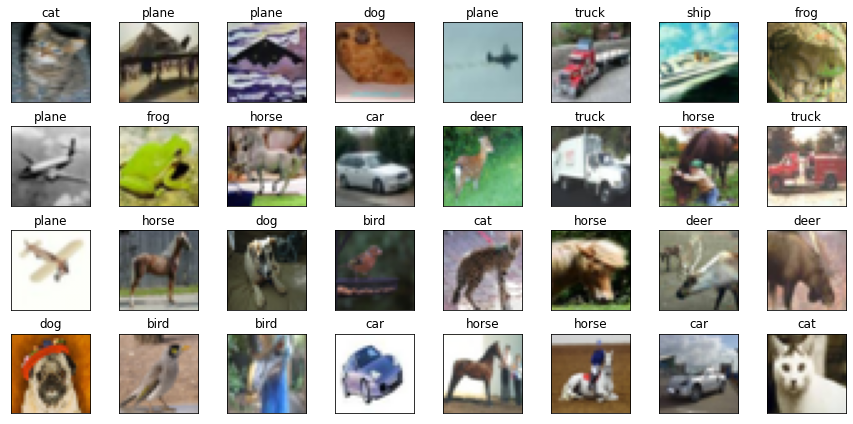

In [3]:
images, labels = iter(helper.data.train_dataset).next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

然后看看做了data augmentation的图片。

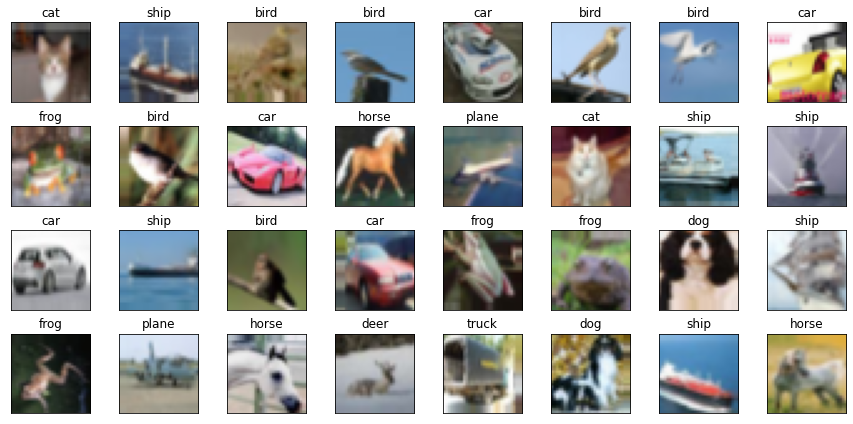

In [4]:
images, labels = helper.data.train_dataset_aug.next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

下面来看看各个class的数据分布。可以看到各个数字的分布还是比较均匀的。

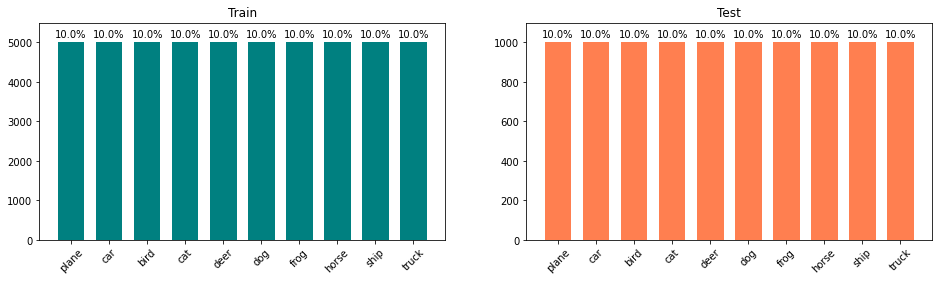

In [5]:
helper.plot_distribution()

## MLP

In [6]:
def get_mlp(helper, name='mlp', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Flatten()(input)
    x = layers.Dense(128, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model

model = get_mlp(helper)
model.summary()

dropout=0.0
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10-aug/mlp/checkpoint
Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________




下面来训练模型。

2020-12-26 00:39:46,395: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.9564 - accuracy: 0.2941 - val_loss: 1.8458 - val_accuracy: 0.3431
Epoch 2/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.8318 - accuracy: 0.3392 - val_loss: 1.7522 - val_accuracy: 0.3596
Epoch 3/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.7911 - accuracy: 0.3534 - val_loss: 1.7095 - val_accuracy: 0.3919
Epoch 4/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.7626 - accuracy: 0.3657 - val_loss: 1.6704 - val_accuracy: 0.4013
Epoch 5/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.7449 - accuracy: 0.3715 - val_loss: 1.6510 - val_accuracy: 0.4122
Epoch 6/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.7264 - accuracy: 0.3804 - val_loss: 1.6451 - val_accuracy: 0.4093
Epoch 7/120
1562/1562 [========================

Epoch 56/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6339 - accuracy: 0.4166 - val_loss: 1.5637 - val_accuracy: 0.4410
Epoch 57/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6322 - accuracy: 0.4151 - val_loss: 1.5548 - val_accuracy: 0.4444
Epoch 58/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6302 - accuracy: 0.4158 - val_loss: 1.5575 - val_accuracy: 0.4395
Epoch 59/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6347 - accuracy: 0.4137 - val_loss: 1.5844 - val_accuracy: 0.4345
Epoch 60/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6382 - accuracy: 0.4113 - val_loss: 1.5647 - val_accuracy: 0.4404
Epoch 61/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6354 - accuracy: 0.4145 - val_loss: 1.5606 - val_accuracy: 0.4388
Epoch 62/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.6322 - accuracy: 0.4142 - val_

1562/1562 [==============================] - 29s 18ms/step - loss: 1.5918 - accuracy: 0.4324 - val_loss: 1.5341 - val_accuracy: 0.4584
Epoch 111/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.5922 - accuracy: 0.4292 - val_loss: 1.5231 - val_accuracy: 0.4567
Epoch 112/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.5929 - accuracy: 0.4313 - val_loss: 1.5297 - val_accuracy: 0.4548
Epoch 113/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.5876 - accuracy: 0.4305 - val_loss: 1.5208 - val_accuracy: 0.4598
Epoch 114/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.5893 - accuracy: 0.4302 - val_loss: 1.5227 - val_accuracy: 0.4536
Epoch 115/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.5914 - accuracy: 0.4310 - val_loss: 1.5221 - val_accuracy: 0.4574
Epoch 116/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.5939 - accuracy: 0.4331 - val_loss: 1

2020-12-26 01:37:29,269: INFO: finish training [elapsed time: 3462.87 seconds]


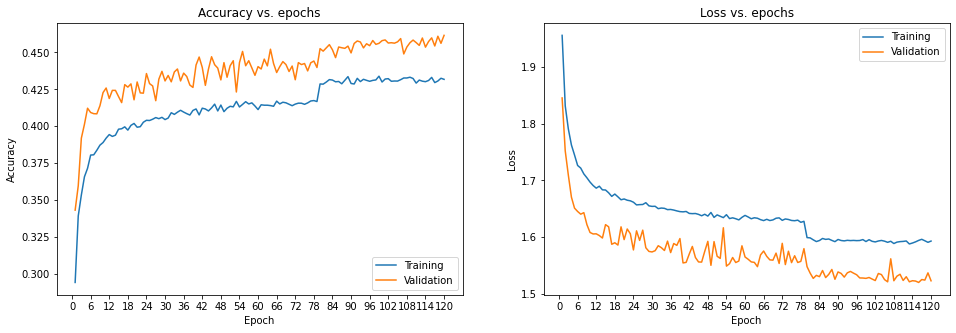

In [7]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:1.5225, Test Accuracy:46.16%
---------------------------------------- confusion matrix ----------------------------------------


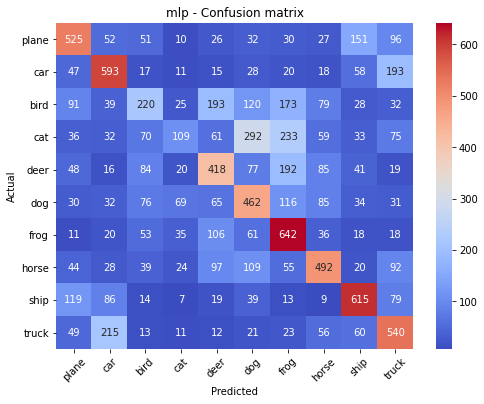

---------------------------------------- model improvement ----------------------------------------


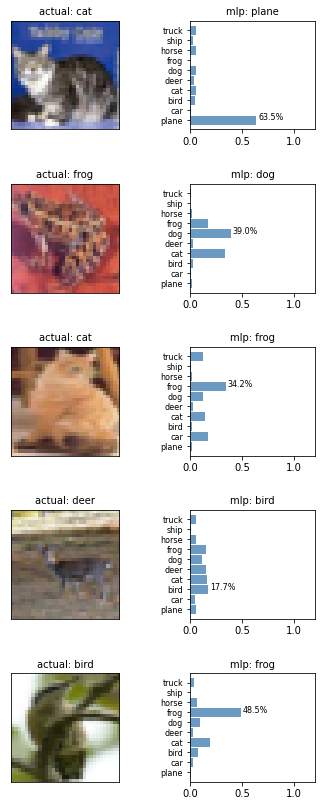

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
mlp,1.525493,0.458,1.522533,0.4616,394634,3462.0


In [8]:
helper.model_summary(model, history=history)




从上面的错误来看，模型对一些细节的判断不是很准。下面来尝试一下LeNet。

## LeNet

![image-20201019113632136](images/image-20201019113632136.png)

LeNet诞生于1994年，是Yann LeCun等人提出的，是最早的卷积神经网络之一。在LeNet中，输入层是32×32的图片，而MNIST是28×28的图片，为了保持模型的结构不变，在第一个Conv2D设置参数padding=’same’。首先创建模型，并训练。

In [9]:
def get_lenet(helper, name='lenet', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(6, (5, 5), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(16, (5, 5), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(84, activation='relu')(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)  

    return model    

# 创建模型
model = get_lenet(helper)
model.summary()

dropout=0.1
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10-aug/lenet/checkpoint
Model: "lenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
____________________________________



下面来训练模型。

2020-12-26 01:37:38,359: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.7221 - accuracy: 0.3766 - val_loss: 1.4091 - val_accuracy: 0.4847
Epoch 2/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.4636 - accuracy: 0.4691 - val_loss: 1.4153 - val_accuracy: 0.4886
Epoch 3/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.3691 - accuracy: 0.5075 - val_loss: 1.1943 - val_accuracy: 0.5719
Epoch 4/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.3098 - accuracy: 0.5306 - val_loss: 1.1761 - val_accuracy: 0.5813
Epoch 5/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.2570 - accuracy: 0.5498 - val_loss: 1.0885 - val_accuracy: 0.6090
Epoch 6/120
1562/1562 [==============================] - 29s 18ms/step - loss: 1.2241 - accuracy: 0.5649 - val_loss: 1.0775 - val_accuracy: 0.6190
Epoch 7/120
1562/1562 [========================

Epoch 56/120
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8970 - accuracy: 0.6874 - val_loss: 0.8559 - val_accuracy: 0.7008
Epoch 57/120
1562/1562 [==============================] - 29s 18ms/step - loss: 0.9003 - accuracy: 0.6826 - val_loss: 0.7990 - val_accuracy: 0.7233
Epoch 58/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8958 - accuracy: 0.6840 - val_loss: 0.9792 - val_accuracy: 0.6717
Epoch 59/120
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8937 - accuracy: 0.6867 - val_loss: 0.7999 - val_accuracy: 0.7226
Epoch 60/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8949 - accuracy: 0.6857 - val_loss: 0.8407 - val_accuracy: 0.7108
Epoch 61/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9000 - accuracy: 0.6861 - val_loss: 0.8108 - val_accuracy: 0.7216
Epoch 62/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8969 - accuracy: 0.6861 - val_

1562/1562 [==============================] - 29s 19ms/step - loss: 0.8195 - accuracy: 0.7140 - val_loss: 0.7443 - val_accuracy: 0.7405
Epoch 111/120
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8207 - accuracy: 0.7124 - val_loss: 0.7757 - val_accuracy: 0.7330
Epoch 112/120
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8206 - accuracy: 0.7113 - val_loss: 0.8567 - val_accuracy: 0.7050
Epoch 113/120
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8158 - accuracy: 0.7121 - val_loss: 0.7562 - val_accuracy: 0.7427
Epoch 114/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8160 - accuracy: 0.7132 - val_loss: 0.7300 - val_accuracy: 0.7479
Epoch 115/120
1562/1562 [==============================] - 29s 18ms/step - loss: 0.8192 - accuracy: 0.7127 - val_loss: 0.7583 - val_accuracy: 0.7389
Epoch 116/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8231 - accuracy: 0.7100 - val_loss: 0

2020-12-26 02:35:41,263: INFO: finish training [elapsed time: 3482.90 seconds]


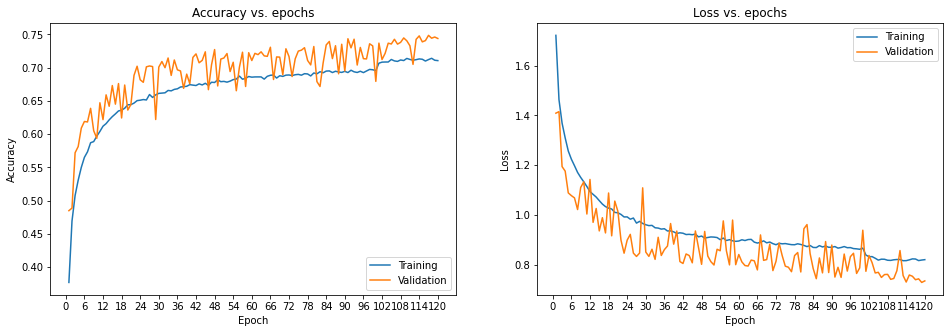

In [10]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和mlp模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.7393, Test Accuracy:74.87%
---------------------------------------- confusion matrix ----------------------------------------


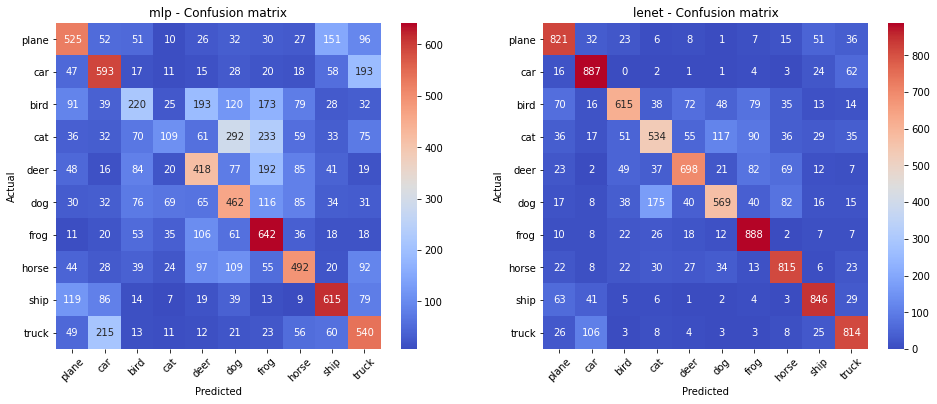

---------------------------------------- model improvement ----------------------------------------


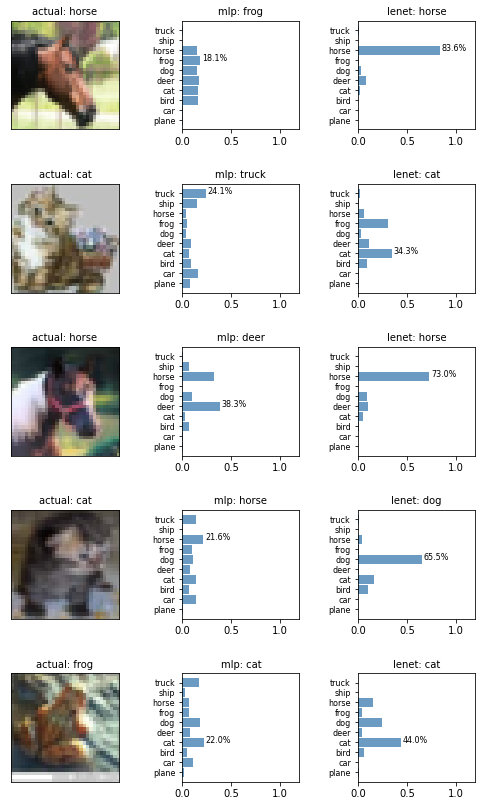

---------------------------------------- error analysis ----------------------------------------


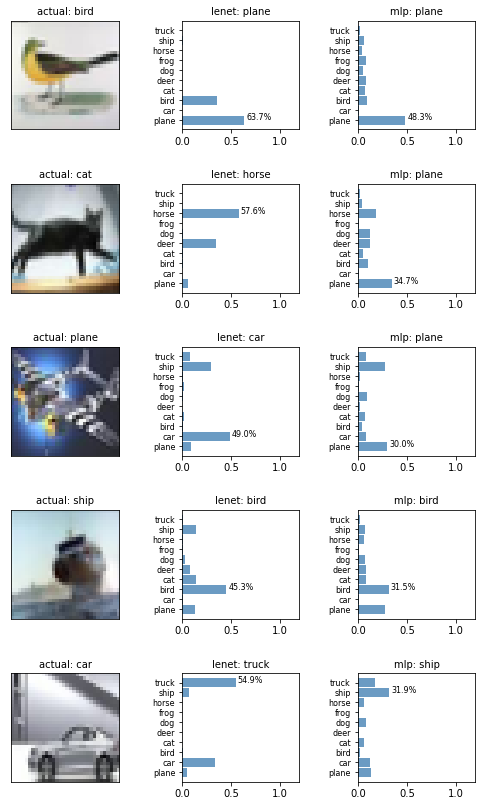

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
lenet,0.594570,0.7929,0.739315,0.7487,83170,3482.0
mlp,1.525493,0.4580,1.522533,0.4616,394634,3462.0


In [11]:
helper.model_summary(model, history=history)



从上面的图中，可以看到，Lenet的参数只有mlp的60%，但其的准确率比mlp提升了差不多1%。上面最后一张图中，有三列，第一列是数字图片，它们是mlp中分错的数字，第二列是mlp中的分类，第三列是lenet中的分类，可以看到lenet的确学到了一些mlp中没有的模式。下面再来看看哪些数字在lenet也分错了。


上图中，可以看到对于部分数字的识别，mlp甚至要更好一点啊，还有一些数字，则是一起都错了。

## Custom 1

下面自己定义一个模型，这个模型和lenet的主要区别是，增加了卷积的深度。

In [12]:
def get_custom1(helper, name='custom_cnn', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x) 
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)  
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model   

# 创建模型
model = get_custom1(helper)
model.summary()

dropout=0.1
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10-aug/custom_cnn/checkpoint
Model: "custom_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________________________


可以发现参数的个数已经和mlp差不多了，下面来训练模型。

2020-12-26 02:35:56,350: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.5959 - accuracy: 0.4243 - val_loss: 1.7362 - val_accuracy: 0.4046
Epoch 2/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.2862 - accuracy: 0.5405 - val_loss: 1.1588 - val_accuracy: 0.5871
Epoch 3/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.1645 - accuracy: 0.5876 - val_loss: 1.2965 - val_accuracy: 0.5535
Epoch 4/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0918 - accuracy: 0.6155 - val_loss: 0.9854 - val_accuracy: 0.6508
Epoch 5/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0389 - accuracy: 0.6342 - val_loss: 1.3515 - val_accuracy: 0.5716
Epoch 6/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0017 - accuracy: 0.6470 - val_loss: 0.8633 - val_accuracy: 0.7024
Epoch 7/120
1562/1562 [========================

Epoch 56/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6695 - accuracy: 0.7691 - val_loss: 0.6172 - val_accuracy: 0.7878
Epoch 57/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6672 - accuracy: 0.7695 - val_loss: 0.5956 - val_accuracy: 0.7948
Epoch 58/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6636 - accuracy: 0.7703 - val_loss: 0.5896 - val_accuracy: 0.7956
Epoch 59/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6654 - accuracy: 0.7697 - val_loss: 0.7377 - val_accuracy: 0.7438
Epoch 60/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6606 - accuracy: 0.7733 - val_loss: 0.5839 - val_accuracy: 0.7989
Epoch 61/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6589 - accuracy: 0.7707 - val_loss: 0.6109 - val_accuracy: 0.7937
Epoch 62/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.6517 - accuracy: 0.7755 - val_

1562/1562 [==============================] - 28s 18ms/step - loss: 0.5694 - accuracy: 0.8040 - val_loss: 0.5042 - val_accuracy: 0.8271
Epoch 110/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5736 - accuracy: 0.8028 - val_loss: 0.5153 - val_accuracy: 0.8240
Epoch 111/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5646 - accuracy: 0.8031 - val_loss: 0.5079 - val_accuracy: 0.8265
Epoch 112/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5669 - accuracy: 0.8033 - val_loss: 0.5023 - val_accuracy: 0.8278
Epoch 113/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5662 - accuracy: 0.8038 - val_loss: 0.5356 - val_accuracy: 0.8173
Epoch 114/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5647 - accuracy: 0.8022 - val_loss: 0.5284 - val_accuracy: 0.8188
Epoch 115/120
1562/1562 [==============================] - 28s 18ms/step - loss: 0.5647 - accuracy: 0.8033 - val_loss: 0

2020-12-26 03:32:54,565: INFO: finish training [elapsed time: 3418.22 seconds]


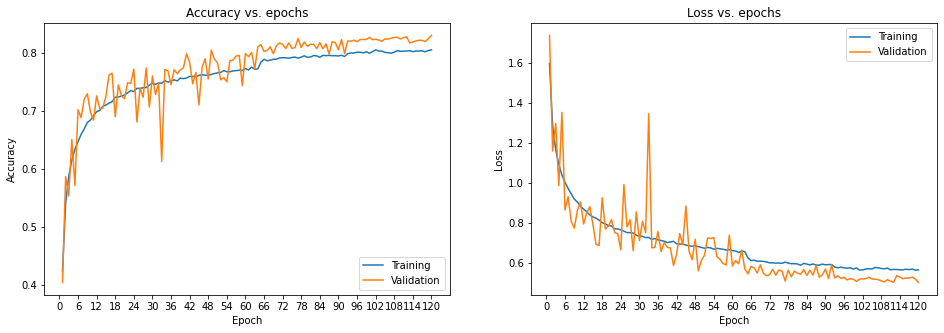

In [13]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和lenet模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.5015, Test Accuracy:83.03%
---------------------------------------- confusion matrix ----------------------------------------


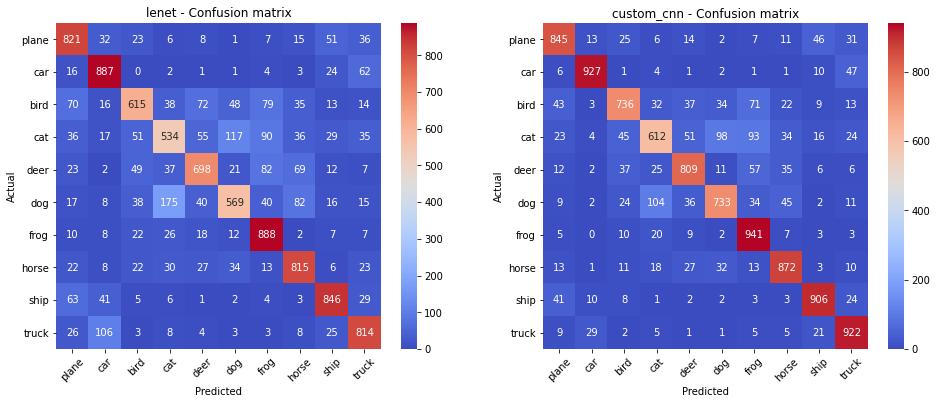

---------------------------------------- model improvement ----------------------------------------


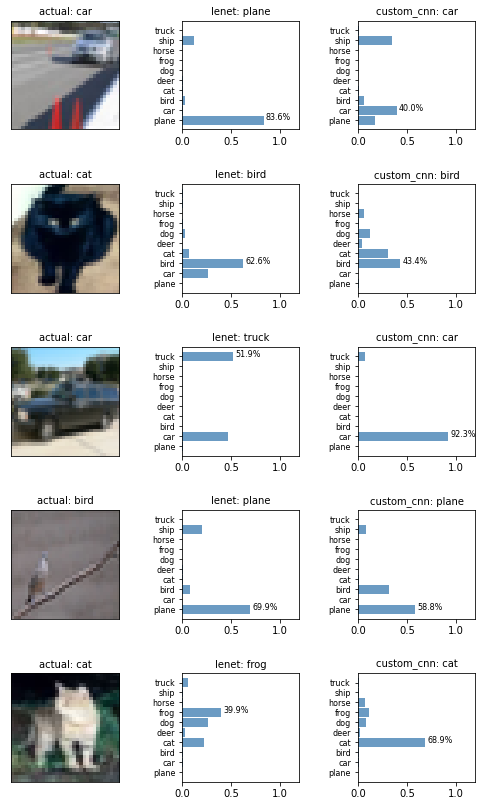

---------------------------------------- error analysis ----------------------------------------


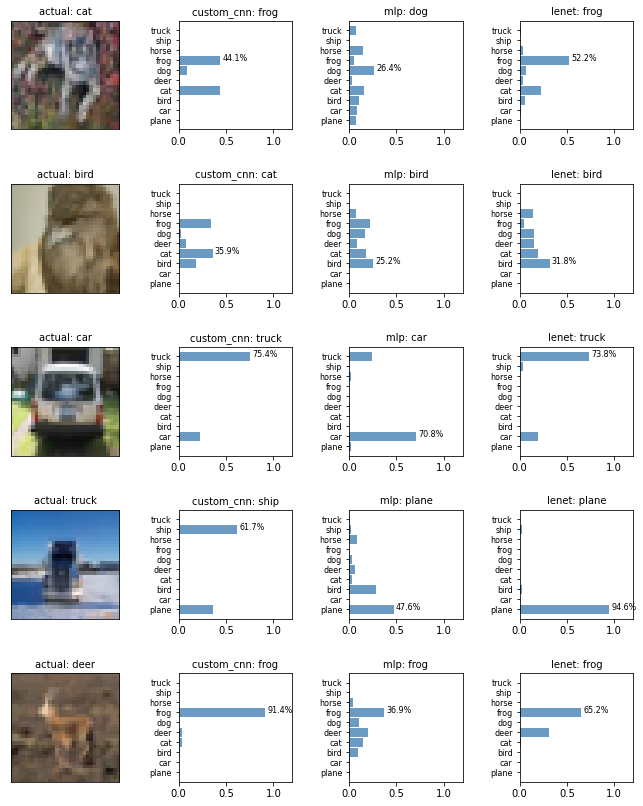

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
custom_cnn,0.396333,0.8630,0.501542,0.8303,73738,3418.0
lenet,0.594570,0.7929,0.739315,0.7487,83170,3482.0
mlp,1.525493,0.4580,1.522533,0.4616,394634,3462.0


In [14]:
helper.model_summary(model, history=history)



可以看到custom1模型的效果比lenet有些许提升（经过多次测试，平均好0.1-0.3个百分点）。上面最后一幅图，也能看到custom1模型学习到了不少新的模式。下面来看错误分析。

## VGG

In [15]:
def get_block(x, filters, conv_count, kernel_size=(3, 3), padding='same', use_bn=True, dropout=0, block_name='block'):
    for i in range(conv_count):
        x = layers.Conv2D(filters, kernel_size, padding=padding, name='{}_con{}'.format(block_name, i+1))(x)
        if use_bn: x = layers.BatchNormalization(name='{}_bn{}'.format(block_name, i+1))(x)
        x = layers.ReLU(name='{}_relu{}'.format(block_name, i+1))(x)
    x = layers.MaxPooling2D((2, 2), name='{}_maxpooling1'.format(block_name))(x)
    if dropout>0: x = layers.Dropout(dropout, name='{}_dropout1'.format(block_name))(x)
    return x
    
def get_vgg(helper, name='vgg',
              dense_layer_count=1, 
              dense_layer_units=128,
              conv_filters=64,
              block_count=3,
              use_bn=True,
              dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = input    
    for i in range(block_count): 
        x = get_block(x, conv_filters, conv_count=2, use_bn=use_bn, dropout=dropout, 
                      block_name='block{}'.format(i+1))
        conv_filters = conv_filters*2
                    
    x = layers.Flatten()(x)
    for i in range(dense_layer_count):
        x = layers.Dense(128, activation='relu')(x)
        if dropout>0: x = layers.Dropout(dropout)(x)    
    x = layers.Dense(10)(x)
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model


model = get_vgg(helper, dense_layer_count=1, block_count=3, name='vgg8')
model.summary()



dropout=0.3
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10-aug/vgg8/checkpoint
Model: "vgg8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_con1 (Conv2D)         (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_bn1 (BatchNormalizati (None, 32, 32, 64)        256       
_________________________________________________________________
block1_relu1 (ReLU)          (None, 32, 32, 64)        0         
_________________________________________________________________
block1_con2 (Conv2D)         (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_bn2 (BatchNormalizati (None, 32, 32, 64)        256       
______________________________________

2020-12-26 03:33:11,163: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1562/1562 [==============================] - 29s 19ms/step - loss: 2.0201 - accuracy: 0.2269 - val_loss: 1.7760 - val_accuracy: 0.2968
Epoch 2/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.7954 - accuracy: 0.2956 - val_loss: 1.5551 - val_accuracy: 0.4296
Epoch 3/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.7123 - accuracy: 0.3349 - val_loss: 1.3448 - val_accuracy: 0.5080
Epoch 4/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.6366 - accuracy: 0.3665 - val_loss: 1.3761 - val_accuracy: 0.5156
Epoch 5/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.5865 - accuracy: 0.3885 - val_loss: 1.3918 - val_accuracy: 0.5224
Epoch 6/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.4855 - accuracy: 0.4398 - val_loss: 1.1543 - val_accuracy: 0.6011
Epoch 7/120
1562/1562 [========================

Epoch 56/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.2410 - accuracy: 0.9187 - val_loss: 0.4148 - val_accuracy: 0.8789
Epoch 57/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.2345 - accuracy: 0.9194 - val_loss: 0.3478 - val_accuracy: 0.9000
Epoch 58/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.2305 - accuracy: 0.9218 - val_loss: 0.4013 - val_accuracy: 0.8875
Epoch 59/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.2323 - accuracy: 0.9209 - val_loss: 0.3734 - val_accuracy: 0.8956
Epoch 60/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.2276 - accuracy: 0.9217 - val_loss: 0.4010 - val_accuracy: 0.8890
Epoch 61/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.2273 - accuracy: 0.9221 - val_loss: 0.3732 - val_accuracy: 0.8997
Epoch 62/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.2260 - accuracy: 0.9224 - val_

1562/1562 [==============================] - 29s 19ms/step - loss: 0.0992 - accuracy: 0.9651 - val_loss: 0.3512 - val_accuracy: 0.9205
Epoch 110/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.0975 - accuracy: 0.9665 - val_loss: 0.3535 - val_accuracy: 0.9179
Epoch 111/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.0995 - accuracy: 0.9656 - val_loss: 0.3510 - val_accuracy: 0.9190
Epoch 112/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.0960 - accuracy: 0.9655 - val_loss: 0.3608 - val_accuracy: 0.9192
Epoch 113/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.0990 - accuracy: 0.9661 - val_loss: 0.3551 - val_accuracy: 0.9180
Epoch 114/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.0948 - accuracy: 0.9676 - val_loss: 0.3596 - val_accuracy: 0.9176
Epoch 115/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.0944 - accuracy: 0.9669 - val_loss: 0

2020-12-26 04:31:29,870: INFO: finish training [elapsed time: 3498.71 seconds]


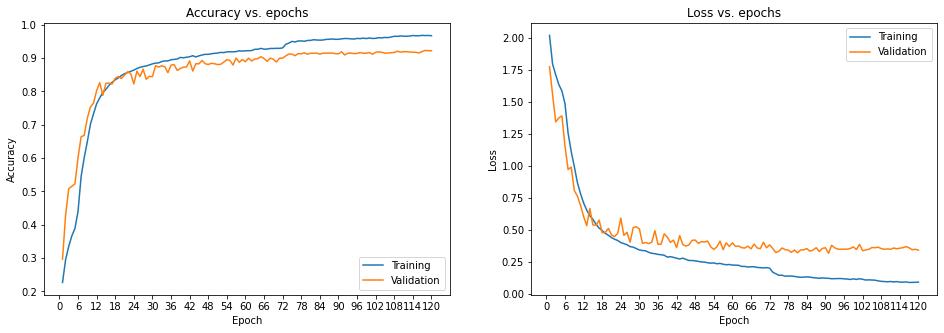

In [16]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.3473, Test Accuracy:92.29%
---------------------------------------- confusion matrix ----------------------------------------


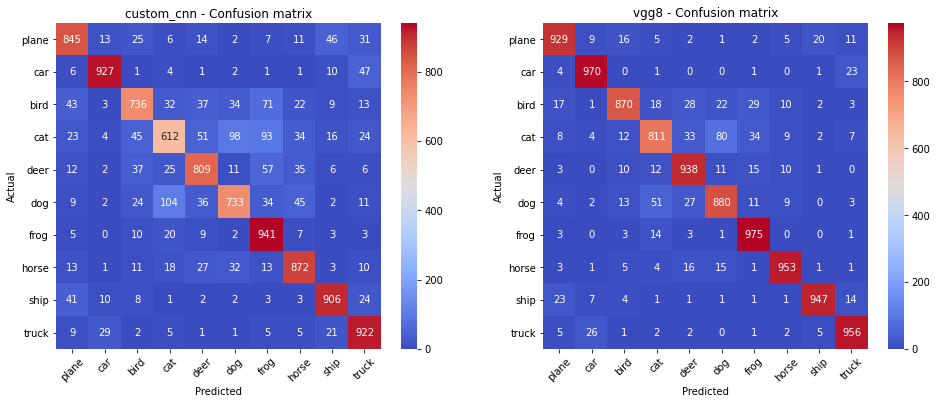

---------------------------------------- model improvement ----------------------------------------


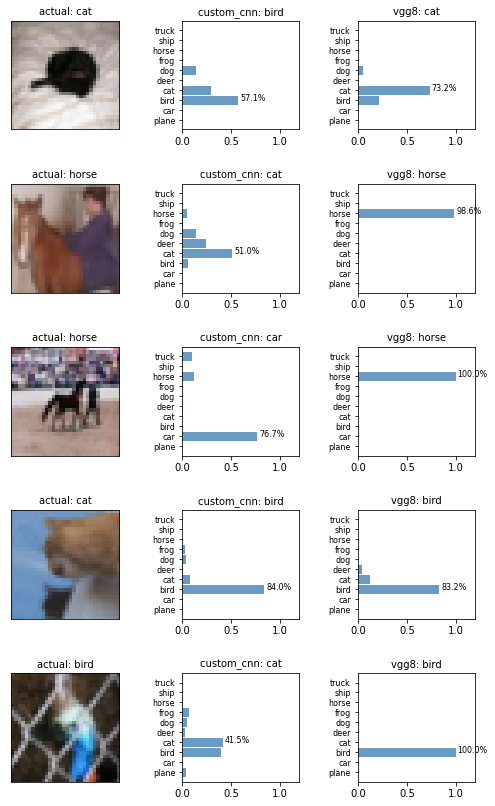

---------------------------------------- error analysis ----------------------------------------


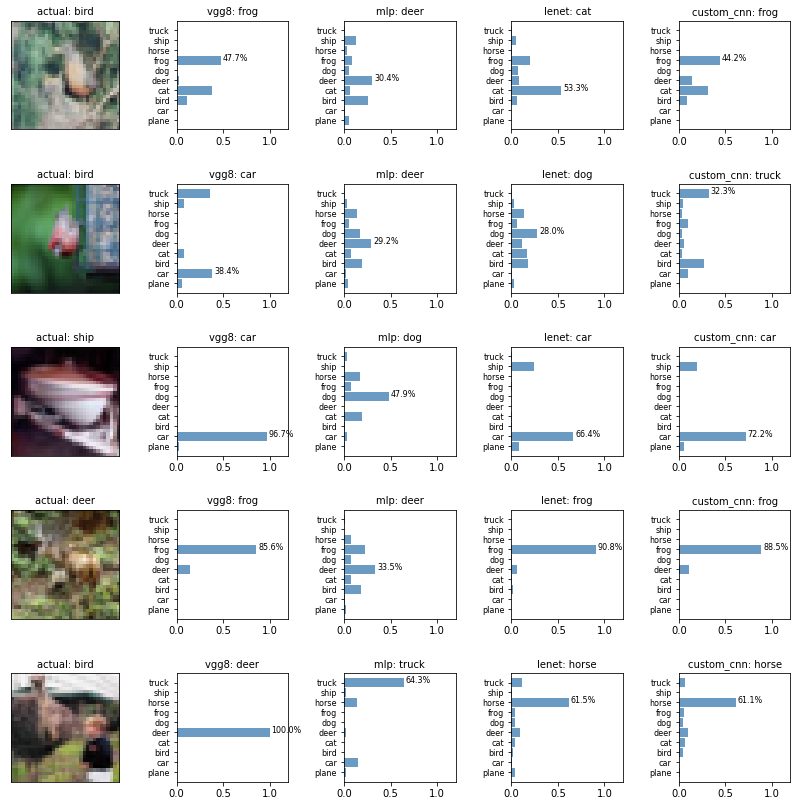

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.018853,0.9939,0.347327,0.9229,1672906,3498.0
custom_cnn,0.396333,0.8630,0.501542,0.8303,73738,3418.0
lenet,0.594570,0.7929,0.739315,0.7487,83170,3482.0
mlp,1.525493,0.4580,1.522533,0.4616,394634,3462.0


In [17]:
helper.model_summary(model, history=history)

## Resnet

参考https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter2-deep-networks/resnet-cifar10-2.2.1.py

In [18]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = layers.Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
    else:
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10, name='resnet_v1'):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = layers.Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = layers.add([x, y])
            x = layers.Activation('relu')(x)

        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = layers.AveragePooling2D(pool_size=7)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name=name)
    return model

def get_resnet_v1(helper, depth=32, name='resnet_v1'):       
    model = resnet_v1(helper.data.input_shape, depth=depth, name='{}_{}'.format(name, depth))
    helper.compile(model)
    return model

model = get_resnet_v1(helper, depth=20)
model.summary()

learning_rate=0.001
checkpoint_path=./checkpoints/cifar10-aug/resnet_v1_20/checkpoint
Model: "resnet_v1_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 16)   448         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 32, 32, 16)   64          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization_5[0][0]      
_

2020-12-26 04:31:49,454: INFO: start training


stopping_patience=40
learning_rate_patience=15
using data augmentation
Epoch 1/120
1562/1562 [==============================] - 30s 19ms/step - loss: 1.5847 - accuracy: 0.4811 - val_loss: 1.4985 - val_accuracy: 0.5350
Epoch 2/120
1562/1562 [==============================] - 30s 19ms/step - loss: 1.1801 - accuracy: 0.6359 - val_loss: 1.1008 - val_accuracy: 0.6767
Epoch 3/120
1562/1562 [==============================] - 29s 19ms/step - loss: 1.0131 - accuracy: 0.7029 - val_loss: 1.6003 - val_accuracy: 0.5575
Epoch 4/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.9194 - accuracy: 0.7393 - val_loss: 1.2593 - val_accuracy: 0.6397
Epoch 5/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8538 - accuracy: 0.7627 - val_loss: 1.2208 - val_accuracy: 0.6489
Epoch 6/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.8103 - accuracy: 0.7789 - val_loss: 0.9005 - val_accuracy: 0.7539
Epoch 7/120
1562/1562 [========================

Epoch 56/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5084 - accuracy: 0.8963 - val_loss: 0.7427 - val_accuracy: 0.8345
Epoch 57/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5103 - accuracy: 0.8958 - val_loss: 0.6478 - val_accuracy: 0.8570
Epoch 58/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5079 - accuracy: 0.8973 - val_loss: 0.7305 - val_accuracy: 0.8282
Epoch 59/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5069 - accuracy: 0.8970 - val_loss: 0.7184 - val_accuracy: 0.8405
Epoch 60/120
1562/1562 [==============================] - 30s 19ms/step - loss: 0.5050 - accuracy: 0.8986 - val_loss: 0.7427 - val_accuracy: 0.8264
Epoch 61/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5023 - accuracy: 0.8997 - val_loss: 0.7390 - val_accuracy: 0.8292
Epoch 62/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.5073 - accuracy: 0.8982 - val_

1562/1562 [==============================] - 29s 19ms/step - loss: 0.1950 - accuracy: 0.9773 - val_loss: 0.4665 - val_accuracy: 0.9066
Epoch 110/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.1952 - accuracy: 0.9774 - val_loss: 0.4610 - val_accuracy: 0.9073
Epoch 111/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.1902 - accuracy: 0.9780 - val_loss: 0.4559 - val_accuracy: 0.9093
Epoch 112/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.1846 - accuracy: 0.9799 - val_loss: 0.4703 - val_accuracy: 0.9067
Epoch 113/120
1562/1562 [==============================] - 30s 19ms/step - loss: 0.1853 - accuracy: 0.9790 - val_loss: 0.4654 - val_accuracy: 0.9083
Epoch 114/120
1562/1562 [==============================] - 30s 19ms/step - loss: 0.1827 - accuracy: 0.9795 - val_loss: 0.4680 - val_accuracy: 0.9114
Epoch 115/120
1562/1562 [==============================] - 29s 19ms/step - loss: 0.1803 - accuracy: 0.9801 - val_loss: 0

2020-12-26 05:30:51,652: INFO: finish training [elapsed time: 3542.20 seconds]


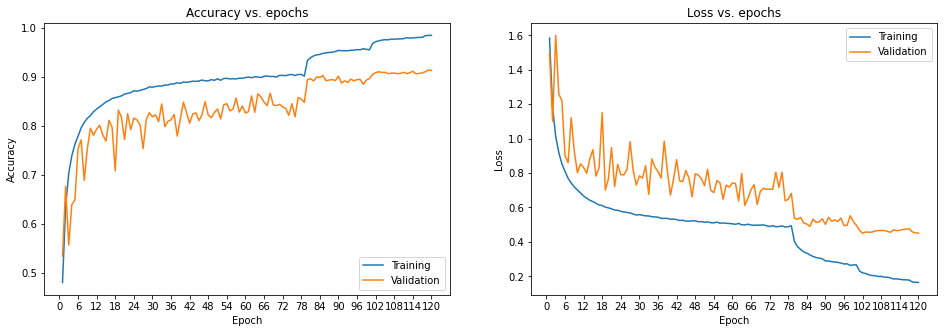

In [19]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.4526, Test Accuracy:91.39%
---------------------------------------- confusion matrix ----------------------------------------


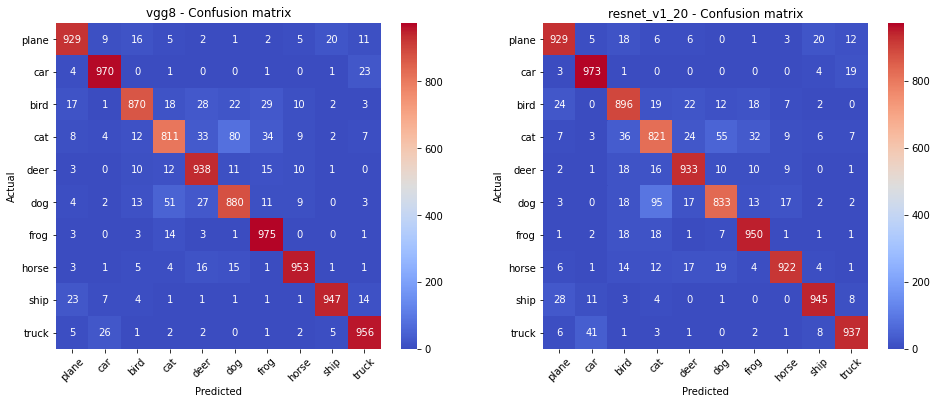

---------------------------------------- model improvement ----------------------------------------


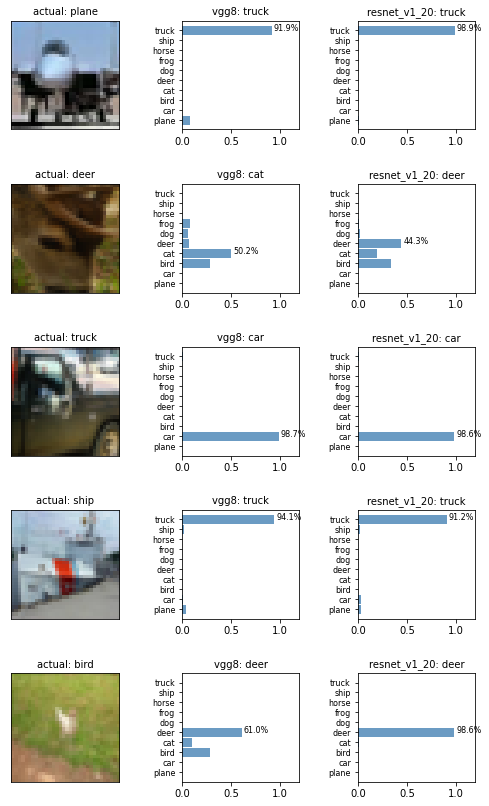

---------------------------------------- error analysis ----------------------------------------


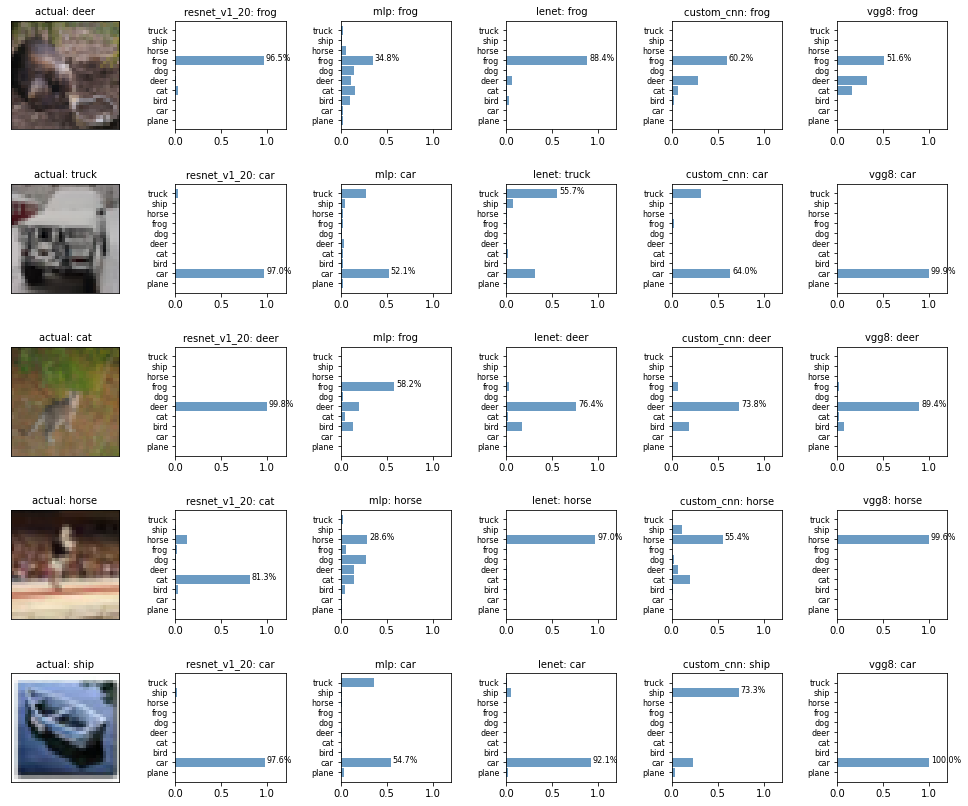

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.018853,0.9939,0.347327,0.9229,1672906,3498.0
resnet_v1_20,0.156663,0.9872,0.452593,0.9139,273066,3542.0
custom_cnn,0.396333,0.8630,0.501542,0.8303,73738,3418.0
lenet,0.594570,0.7929,0.739315,0.7487,83170,3482.0
mlp,1.525493,0.4580,1.522533,0.4616,394634,3462.0


In [20]:
helper.model_summary(model, history=history)

## 总结